In [87]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
import torch_geometric.utils
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.utils.convert import from_networkx

proof_db = pd.read_csv('../tag_proof.csv',dtype={'tag': str})
tag_dict = proof_db.set_index('tag').to_dict(orient='index')


In [101]:
tag_dict['mp2']


{'proof': "{3: '$e |- ps', 8: '$e |- ph', 9: '$e |- ( ph -> ( ps -> ch ) )', 10: '$a |- ( ps -> ch )', 11: '$a |- ch'}",
 'node': "{'ax-mp': {10: [8, 9], 11: [3, 10]}}",
 'hpt': "{'mp2.2': [3], 'mp2.1': [8], 'mp2.3': [9]}"}

In [103]:
node_list = {3:'$e |- ps',8:'$e |- ph',9:'$e |- ( ph -> ( ps -> ch ) )',10:'$a |- ( ps -> ch )',11: '$a |- ch'}
edge_index = torch.tensor([[3,  10, 8, 9],
                           [11, 11, 10, 10]], dtype=torch.long)
value
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

DiGraph with 8 nodes and 4 edges


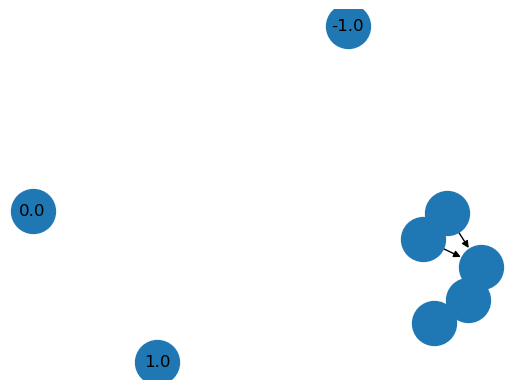

In [105]:
g = torch_geometric.utils.to_networkx(data)
pos = nx.spring_layout(g, seed = 1)
labels = {i:x[i].item() for i in range(3)}
nx.draw_networkx_labels(g, pos, labels)
print(g)
# Plot the graph
nx.draw(g, pos, node_size=1000)

In [86]:
proof_db.iloc[2]["node"]

"{'ax-mp': {10: [8, 9], 11: [3, 10]}}"

In [80]:
proof_db.iloc[2]["proof"]

"{3: '$e |- ps', 8: '$e |- ph', 9: '$e |- ( ph -> ( ps -> ch ) )', 10: '$a |- ( ps -> ch )', 11: '$a |- ch'}"

In [11]:
len(proof_db)

42494

In [48]:
# Make the networkx graph
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 1, 'x': 0.5}),
      (2, {'y': 2, 'x': 0.2}),
      (3, {'y': 3, 'x': 0.3}),
      (4, {'y': 4, 'x': 0.1}),
      (5, {'y': 5, 'x': 0.2}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


# Split the data 
train_ratio = 0.2
num_nodes = pyg_graph.x.shape[0]
num_train = int(num_nodes * train_ratio)
idx = [i for i in range(num_nodes)]

np.random.shuffle(idx)
train_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
train_mask[idx[:num_train]] = True
test_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
test_mask[idx[num_train:]] = True

print(train_mask)
# tensor([ True, False, False, False, False])
print(test_mask)
# tensor([False,  True,  True,  True,  True])

Data(x=[5], edge_index=[2, 12], y=[5])
tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
tensor([1, 2, 3, 4, 5])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])
tensor([False, False, False,  True, False])
tensor([ True,  True,  True, False,  True])


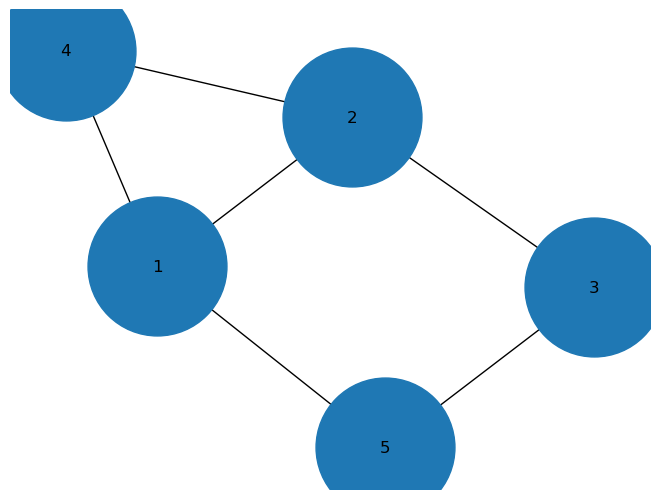

In [56]:
nx.draw(G, node_size=10000,with_labels=True)